# Importing all necessary libraries

In [43]:
import pandas as pd
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Reading the file

In [44]:
df = pd.read_parquet(r"C:\Users\Arya\Downloads\Annual Reports\annual_report_2023.parquet")

# Exploratory Data Analysis

In [45]:
print(df.head())

   VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:32:10   2023-01-01 00:40:36              1.0   
1         2  2023-01-01 00:55:08   2023-01-01 01:01:27              1.0   
2         2  2023-01-01 00:25:04   2023-01-01 00:37:49              1.0   
3         1  2023-01-01 00:03:48   2023-01-01 00:13:25              0.0   
4         2  2023-01-01 00:10:29   2023-01-01 00:21:19              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           0.97         1.0                  N           161           141   
1           1.10         1.0                  N            43           237   
2           2.51         1.0                  N            48           238   
3           1.90         1.0                  N           138             7   
4           1.43         1.0                  N           107            79   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \


In [46]:
print(df.tail())

          VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
38310221         2  2023-12-31 23:04:34   2023-12-31 23:13:58   
38310222         2  2023-12-31 23:08:15   2023-12-31 23:08:23   
38310223         2  2023-12-31 23:16:15   2023-12-31 23:30:28   
38310224         2  2023-12-31 23:21:58   2023-12-31 23:34:29   
38310225         2  2023-12-31 23:10:47   2023-12-31 23:27:58   

          passenger_count  trip_distance  RatecodeID store_and_fwd_flag  \
38310221              NaN           1.34         NaN               None   
38310222              NaN           0.00         NaN               None   
38310223              NaN           3.71         NaN               None   
38310224              NaN           5.20         NaN               None   
38310225              NaN           6.81         NaN               None   

          PULocationID  DOLocationID  payment_type  fare_amount  extra  \
38310221           233           163             0        12.08    0.0   
38310222  

In [47]:
df.shape

(38310226, 20)

## Data Cleaning & Formatting

In [97]:
duplicates = df[df.duplicated()]

print(f"Number of duplicate rows: {duplicates.shape[0]}")

Number of duplicate rows: 0


In [48]:
df.isnull().sum()

VendorID                        0
tpep_pickup_datetime            0
tpep_dropoff_datetime           0
passenger_count           1309356
trip_distance                   0
RatecodeID                1309356
store_and_fwd_flag        1309356
PULocationID                    0
DOLocationID                    0
payment_type                    0
fare_amount                     0
extra                           0
mta_tax                         0
tip_amount                      0
tolls_amount                    0
improvement_surcharge           0
total_amount                    0
congestion_surcharge      1309356
airport_fee              35315203
Airport_fee               4304379
dtype: int64

In [49]:
unique_values = df["airport_fee"].unique()

print(unique_values)

[ 0.    1.25 -1.25   nan]


In [50]:
unique_values = df["Airport_fee"].unique()

print(unique_values)

[  nan  0.    1.25 -1.25  1.75 -1.75  1.7   1.  ]


In [51]:
df["airport_fee"] = df["airport_fee"].fillna(0) 
df["Airport_fee"] = df["Airport_fee"].fillna(0)  

#Combine them by summing the values
df["combined_airport_fee"] = df["airport_fee"] + df["Airport_fee"]


In [52]:
print(df[ "combined_airport_fee"].sample(70))

2051110     0.0
15811173    0.0
27421930    0.0
5843556     0.0
6053312     0.0
           ... 
19320409    0.0
25081152    0.0
29478700    0.0
31419758    0.0
3428462     0.0
Name: combined_airport_fee, Length: 70, dtype: float64


In [53]:
unique_values = df["combined_airport_fee"].unique()

print(unique_values)

[ 0.    1.25 -1.25  1.75 -1.75  1.7   1.  ]


In [54]:
df["combined_airport_fee"].isnull().sum()

0

In [55]:
df = df.drop(columns=["airport_fee", "Airport_fee"])

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38310226 entries, 0 to 38310225
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  combined_airport_fee

In [57]:
unique_values = df["passenger_count"].unique()

print(unique_values)

[ 1.  0.  4.  2.  3.  5.  6.  8.  7.  9. nan]


In [58]:
df.describe()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,combined_airport_fee
count,3.831023e+07,38310226,38310226,3.700087e+07,3.831023e+07,3.700087e+07,3.831023e+07,3.831023e+07,3.831023e+07,3.831023e+07,3.831023e+07,3.831023e+07,3.831023e+07,3.831023e+07,3.831023e+07,3.831023e+07,3.700087e+07,3.831023e+07
mean,1.738894e+00,2023-07-02 22:47:58.448232,2023-07-02 23:04:41.459181,1.370426e+00,4.088946e+00,1.641906e+00,1.651755e+02,1.639500e+02,1.184585e+00,1.952225e+01,1.556057e+00,4.856167e-01,3.522265e+00,5.897361e-01,9.794487e-01,2.846194e+01,2.264610e+00,1.352794e-01
min,1.000000e+00,2001-01-01 00:06:49,1970-01-20 10:16:32,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,-1.087300e+03,-3.917000e+01,-5.000000e-01,-4.110000e+02,-9.130000e+01,-1.000000e+00,-1.094050e+03,-2.500000e+00,-1.750000e+00
25%,1.000000e+00,2023-04-02 18:25:17,2023-04-02 18:43:06.250000,1.000000e+00,1.040000e+00,1.000000e+00,1.320000e+02,1.130000e+02,1.000000e+00,9.300000e+00,0.000000e+00,5.000000e-01,1.000000e+00,0.000000e+00,1.000000e+00,1.595000e+01,2.500000e+00,0.000000e+00
50%,2.000000e+00,2023-06-27 18:43:55,2023-06-27 18:59:09,1.000000e+00,1.790000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,1.350000e+01,1.000000e+00,5.000000e-01,2.800000e+00,0.000000e+00,1.000000e+00,2.100000e+01,2.500000e+00,0.000000e+00
75%,2.000000e+00,2023-10-06 21:55:14,2023-10-06 22:11:37,1.000000e+00,3.400000e+00,1.000000e+00,2.340000e+02,2.340000e+02,1.000000e+00,2.190000e+01,2.500000e+00,5.000000e-01,4.410000e+00,0.000000e+00,1.000000e+00,3.072000e+01,2.500000e+00,0.000000e+00
max,6.000000e+00,2024-01-03 19:42:57,2024-01-03 20:15:55,9.000000e+00,3.457294e+05,9.900000e+01,2.650000e+02,2.650000e+02,5.000000e+00,3.869836e+05,1.000250e+04,5.316000e+01,4.174000e+03,6.655600e+02,1.000000e+00,3.869876e+05,2.750000e+00,1.750000e+00
std,4.443591e-01,NaN,NaN,8.925924e-01,2.412509e+02,7.427351e+00,6.399765e+01,6.985543e+01,5.562740e-01,7.572729e+01,2.450399e+00,1.095629e-01,4.147060e+00,2.200999e+00,1.991462e-01,7.712821e+01,7.971481e-01,4.612672e-01


In [59]:
mean_passenger_count = df["passenger_count"].mean()
df.fillna({"passenger_count": mean_passenger_count}, inplace=True)

In [60]:
df["passenger_count"].isnull().sum()

0

In [61]:
unique_values = df["RatecodeID"].unique()

print(unique_values)

[ 1.  2.  4. 99.  5.  3.  6. nan]


In [62]:
mean_passenger_count = df["RatecodeID"].mean()
df.fillna({"RatecodeID": mean_passenger_count}, inplace=True)

In [63]:
df["RatecodeID"].isnull().sum()

0

In [64]:
unique_values = df["store_and_fwd_flag"].unique()

print(unique_values)

['N' 'Y' None]


In [65]:
df["store_and_fwd_flag"] = df["store_and_fwd_flag"].replace({"N": 0, "Y": 1, None: 2})

In [66]:
df["store_and_fwd_flag"] = df["store_and_fwd_flag"].fillna(2)

In [67]:
unique_values = df["store_and_fwd_flag"].unique()

print(unique_values)

[0. 1. 2.]


In [68]:
mean_passenger_count = df["congestion_surcharge"].mean()
df.fillna({"congestion_surcharge": mean_passenger_count}, inplace=True)

In [69]:
df.isnull().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
combined_airport_fee     0
dtype: int64

In [70]:
# Function to remove outliers using IQR
def remove_outliers(df):
    for col in df.select_dtypes(include=np.number).columns:  #Select only numeric columns
        Q1 = df[col].quantile(0.25)  # 25th percentile
        Q3 = df[col].quantile(0.75)  # 75th percentile
        IQR = Q3 - Q1  # Interquartile range

        # Define lower and upper bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Filter out outliers
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    
    return df

# Apply function to DataFrame
df = remove_outliers(df)

In [71]:
df.shape

(17937578, 19)

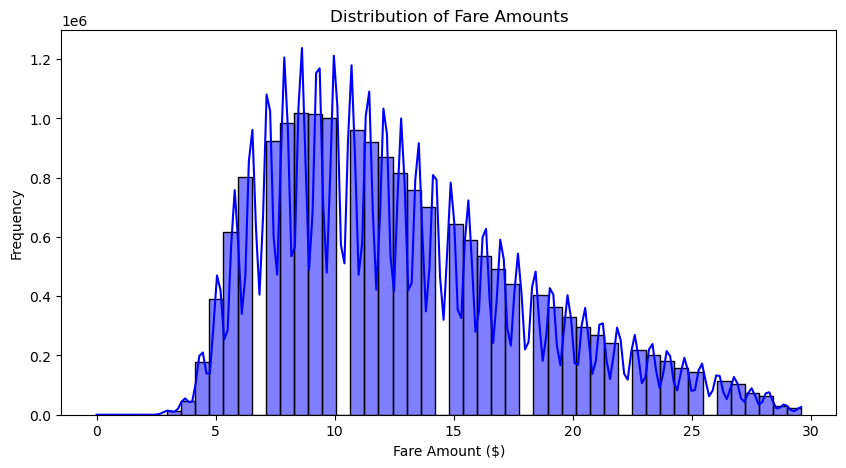

In [82]:
plt.figure(figsize=(10, 5))  # Set figure size

# Create histogram
sns.histplot(df["fare_amount"], bins=50, kde=True, color="blue")

# Labels and title
plt.xlabel("Fare Amount ($)")
plt.ylabel("Frequency")
plt.title("Distribution of Fare Amounts")

# Show the plot
plt.show()

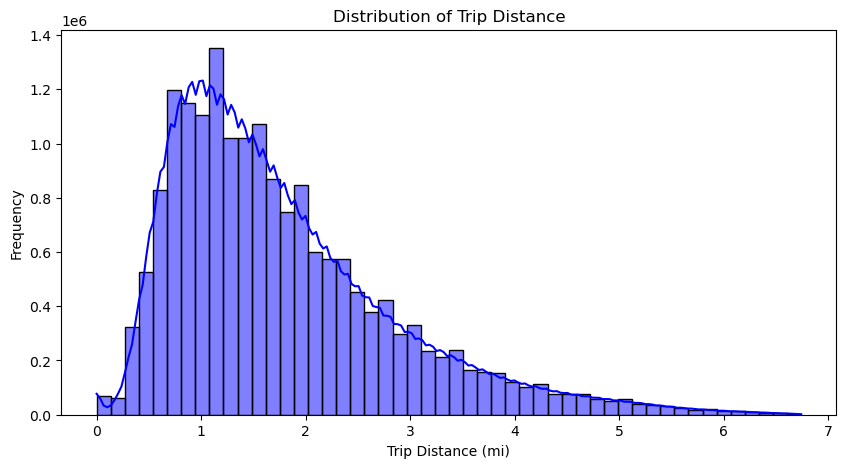

In [83]:
plt.figure(figsize=(10, 5))  # Set figure size

# Create histogram
sns.histplot(df["trip_distance"], bins=50, kde=True, color="blue")

# Labels and title
plt.xlabel("Trip Distance (mi)")
plt.ylabel("Frequency")
plt.title("Distribution of Trip Distance")

# Show the plot
plt.show()

# Visualizing Data

In [72]:
df["tpep_pickup_datetime"] = pd.to_datetime(df["tpep_pickup_datetime"])
df["tpep_dropoff_datetime"] = pd.to_datetime(df["tpep_dropoff_datetime"])

In [73]:
df["month"] = df["tpep_pickup_datetime"].dt.month  # Extract month (1-12)
df["day_of_week"] = df["tpep_pickup_datetime"].dt.dayofweek  # Monday=0, Sunday=6
df["hour"] = df["tpep_pickup_datetime"].dt.hour  # Extract hour (0-23)

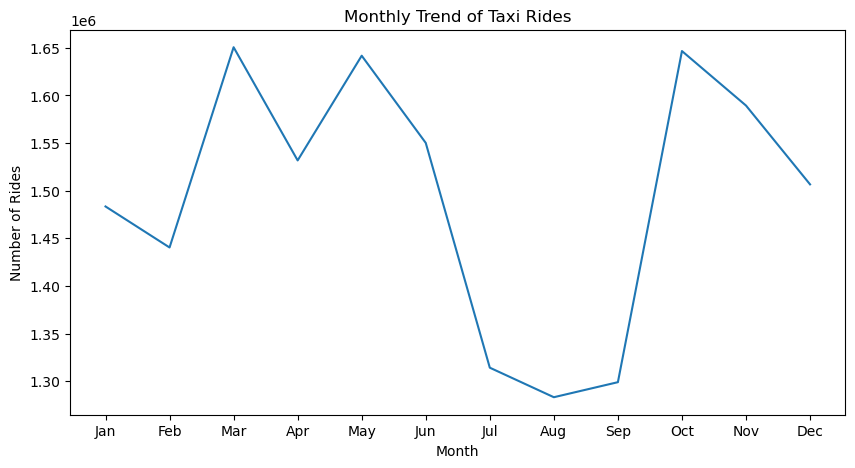

In [74]:
plt.figure(figsize=(10, 5))
sns.lineplot(x=df["month"].value_counts().sort_index().index, 
             y=df["month"].value_counts().sort_index().values)

plt.xticks(range(1, 13), ["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
                          "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.xlabel("Month")
plt.ylabel("Number of Rides")
plt.title("Monthly Trend of Taxi Rides")
plt.show()

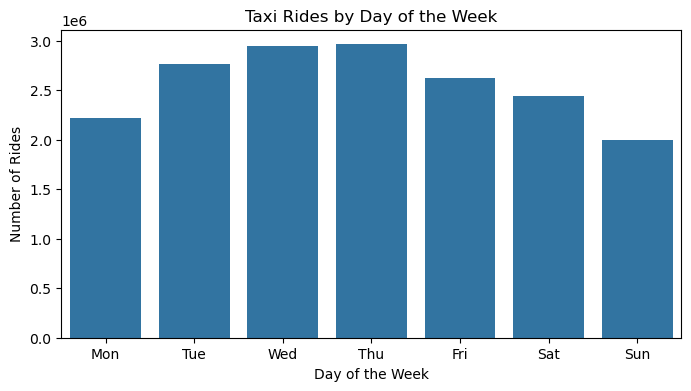

In [75]:
plt.figure(figsize=(8, 4))
sns.barplot(x=df["day_of_week"].value_counts().sort_index().index, 
            y=df["day_of_week"].value_counts().sort_index().values)

plt.xticks(range(7), ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])
plt.xlabel("Day of the Week")
plt.ylabel("Number of Rides")
plt.title("Taxi Rides by Day of the Week")
plt.show()

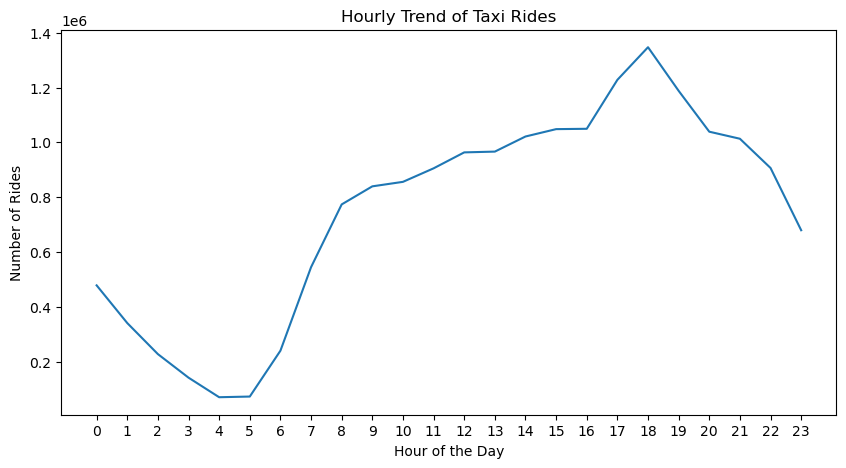

In [76]:
plt.figure(figsize=(10, 5))
sns.lineplot(x=df["hour"].value_counts().sort_index().index, 
             y=df["hour"].value_counts().sort_index().values)

plt.xlabel("Hour of the Day")
plt.ylabel("Number of Rides")
plt.title("Hourly Trend of Taxi Rides")
plt.xticks(range(0, 24))
plt.show()


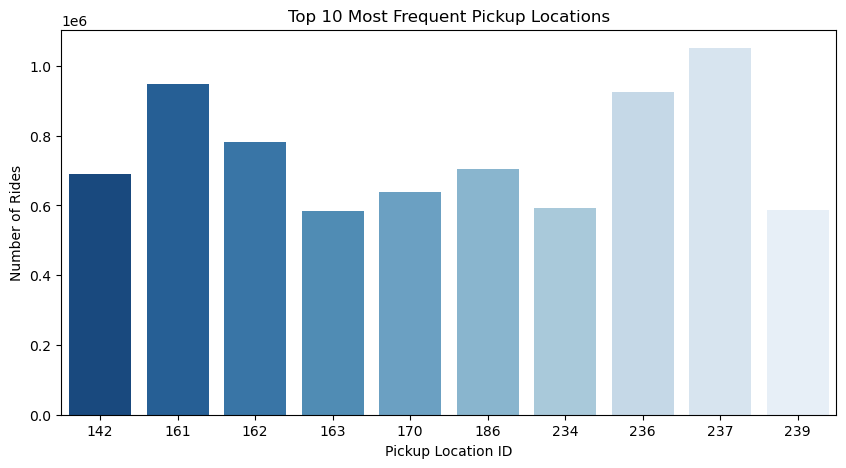

In [77]:
top_pickups = df["PULocationID"].value_counts().head(10)  # Top 10 locations

# Plot the most frequent pickup locations
plt.figure(figsize=(10, 5))
sns.barplot(x=top_pickups.index, y=top_pickups.values, palette="Blues_r")

# Labels and title
plt.xlabel("Pickup Location ID")
plt.ylabel("Number of Rides")
plt.title("Top 10 Most Frequent Pickup Locations")

# Show plot
plt.show()

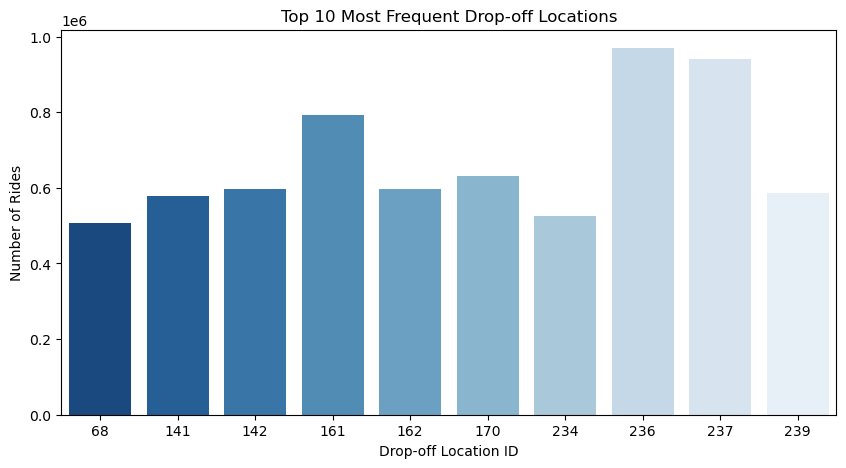

In [79]:
top_pickups = df["DOLocationID"].value_counts().head(10)  # Top 10 locations

# Plot the most frequent pickup locations
plt.figure(figsize=(10, 5))
sns.barplot(x=top_pickups.index, y=top_pickups.values, palette="Blues_r")

# Labels and title
plt.xlabel("Drop-off Location ID")
plt.ylabel("Number of Rides")
plt.title("Top 10 Most Frequent Drop-off Locations")

# Show plot
plt.show()

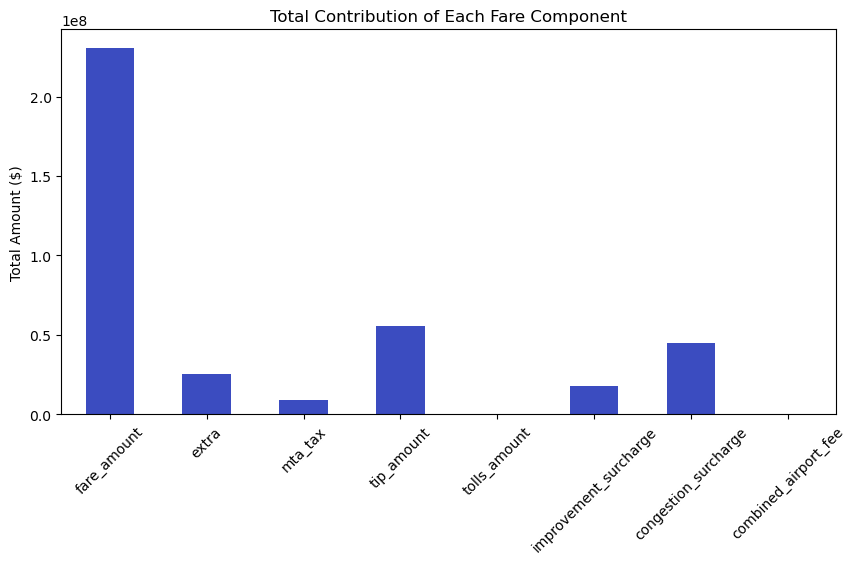

In [81]:
df_sum = df[[
    "fare_amount", "extra", "mta_tax", "tip_amount", "tolls_amount",
    "improvement_surcharge", "congestion_surcharge", "combined_airport_fee"
]].sum()

df_sum.plot(kind="bar", stacked=True, figsize=(10, 5), colormap="coolwarm")

plt.ylabel("Total Amount ($)")
plt.title("Total Contribution of Each Fare Component")
plt.xticks(rotation=45)
plt.show()


In [85]:
# Convert to datetime if not already
df["tpep_pickup_datetime"] = pd.to_datetime(df["tpep_pickup_datetime"])
df["tpep_dropoff_datetime"] = pd.to_datetime(df["tpep_dropoff_datetime"])

# Extract useful datetime features
df["pickup_hour"] = df["tpep_pickup_datetime"].dt.hour
df["dropoff_hour"] = df["tpep_dropoff_datetime"].dt.hour
df["pickup_day"] = df["tpep_pickup_datetime"].dt.dayofweek  # Monday=0, Sunday=6
df["pickup_month"] = df["tpep_pickup_datetime"].dt.month

In [98]:
numeric_columns = [
   "trip_distance","fare_amount", 
    "extra", "tip_amount","total_amount", "pickup_hour", "dropoff_hour", "pickup_day", "pickup_month"
]

In [99]:
correlation_matrix = df[numeric_columns].corr()

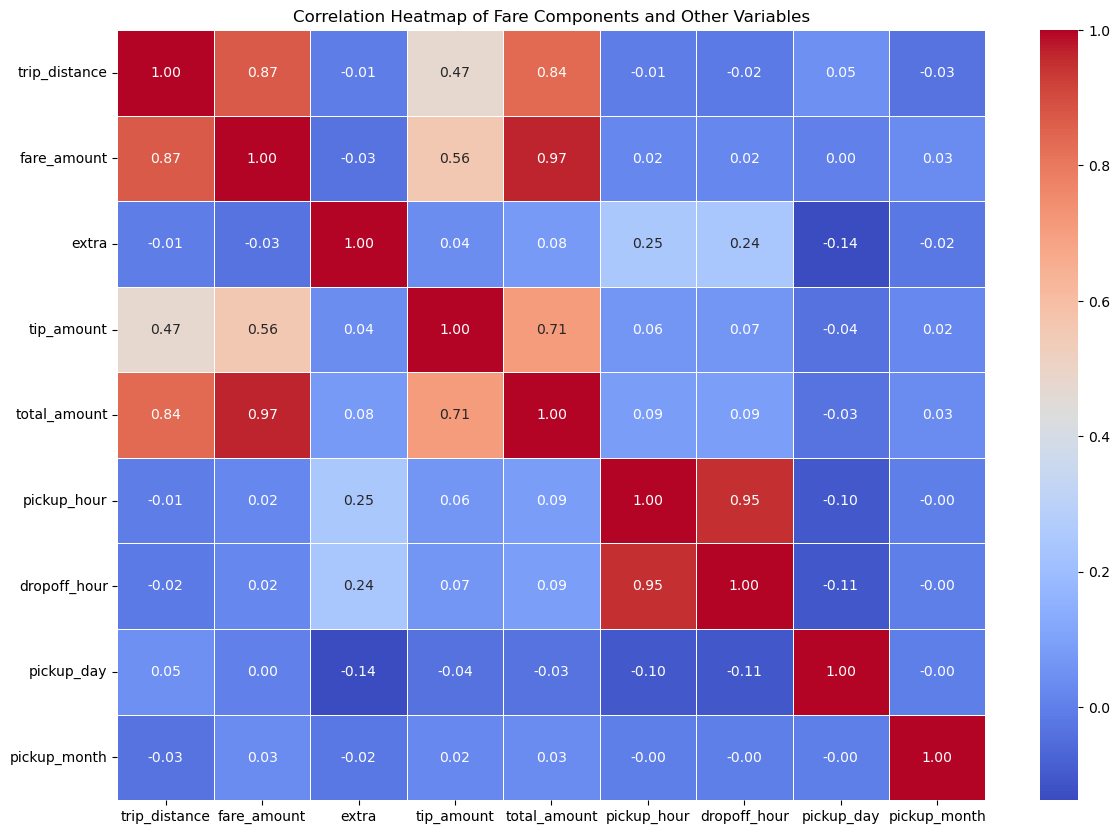

In [100]:
plt.figure(figsize=(14, 10))

# Create heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Labels and title
plt.title("Correlation Heatmap of Fare Components and Other Variables")
plt.show()